<a href="https://colab.research.google.com/github/OddIndustry7616/Video-Game-Sales/blob/main/Video_games_sales_analysis_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#setup


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [4]:
data = pd.read_csv('/content/vgsales.csv')

In [5]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)

In [10]:
data.shape

(16250, 11)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Rank - Ranking of overall sales, integer

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.), object

Year - Year of the game's release, float

Genre - Genre of the game ,object

Publisher - Publisher of the game, object

NA_Sales - Sales in North America (in millions), float

EU_Sales - Sales in Europe (in millions), float

JP_Sales - Sales in Japan (in millions), float

Other_Sales - Sales in the rest of the world (in millions), float

Global_Sales - Total worldwide sales, float

In [12]:

data.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,56
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [13]:
data['Genre'].value_counts()

,count
Genre,
Action,3196
Sports,2308
Misc,1721
Role-Playing,1446
Shooter,1278
Adventure,1252
Racing,1229
Platform,876
Simulation,857


#What genre games have been made the most?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

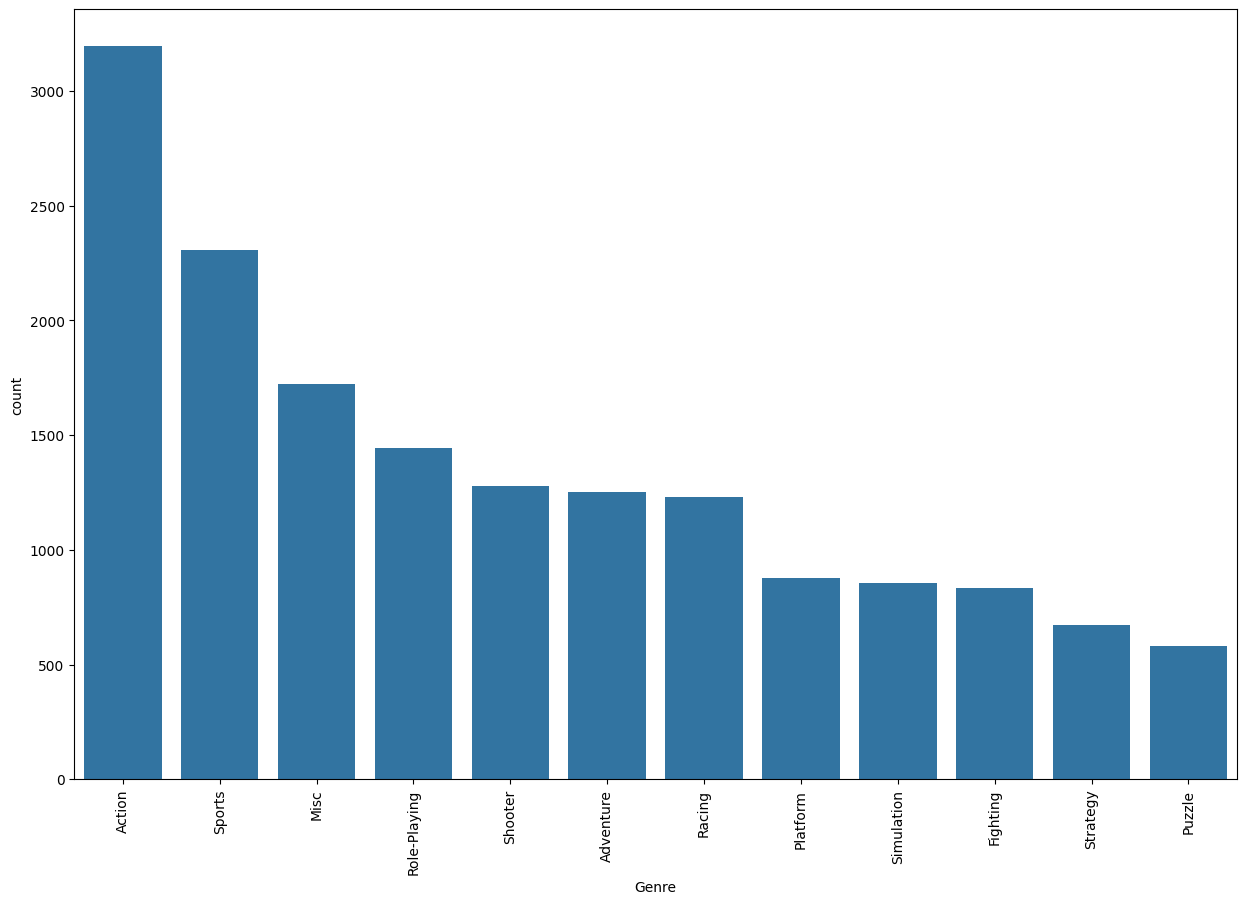

In [15]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)

#Which year had the most game release?

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '1999.0'),
  Text(18, 0, '1997.0'),
  Text(19, 0, '1996.0'),
  Text(20, 0, '1995.0'),
  Text(21, 0, '1994.0'),
  Text(22, 0, '1993.0'),
  Text(23, 0, '1981.0'),
  Text(24, 0, '1992.0'),
  Text(25, 0, '1991.0'),
  Text(26, 0, '1982.0'),
  Text(27, 0, '1986.0'),
  Text(28, 0, '1989.0'),
  Text(29, 0, '1983.0'),
  Text(30, 0, '1990.0'),
  Text(31, 0, '1987.0'),
  T

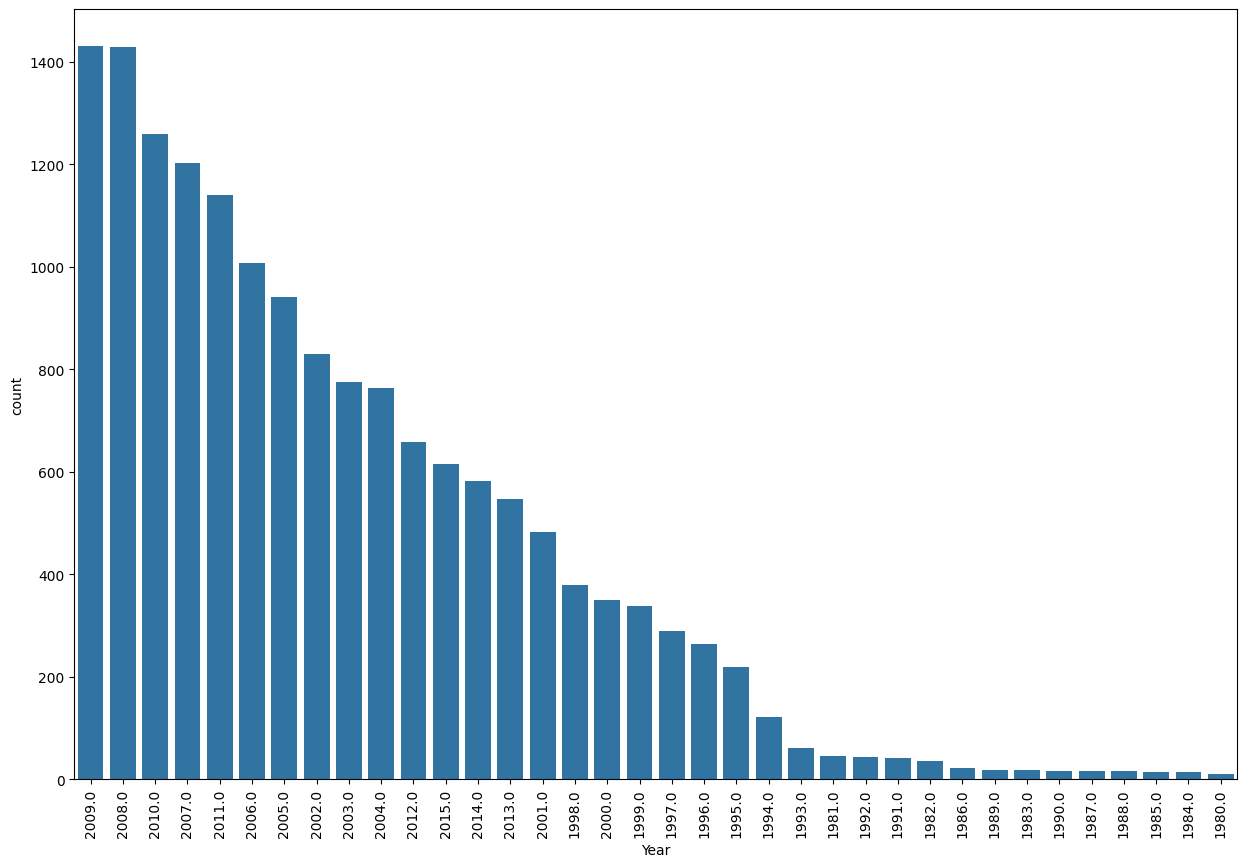

In [16]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

#Top 5 years games release by genre.

([0, 1, 2, 3, 4],
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

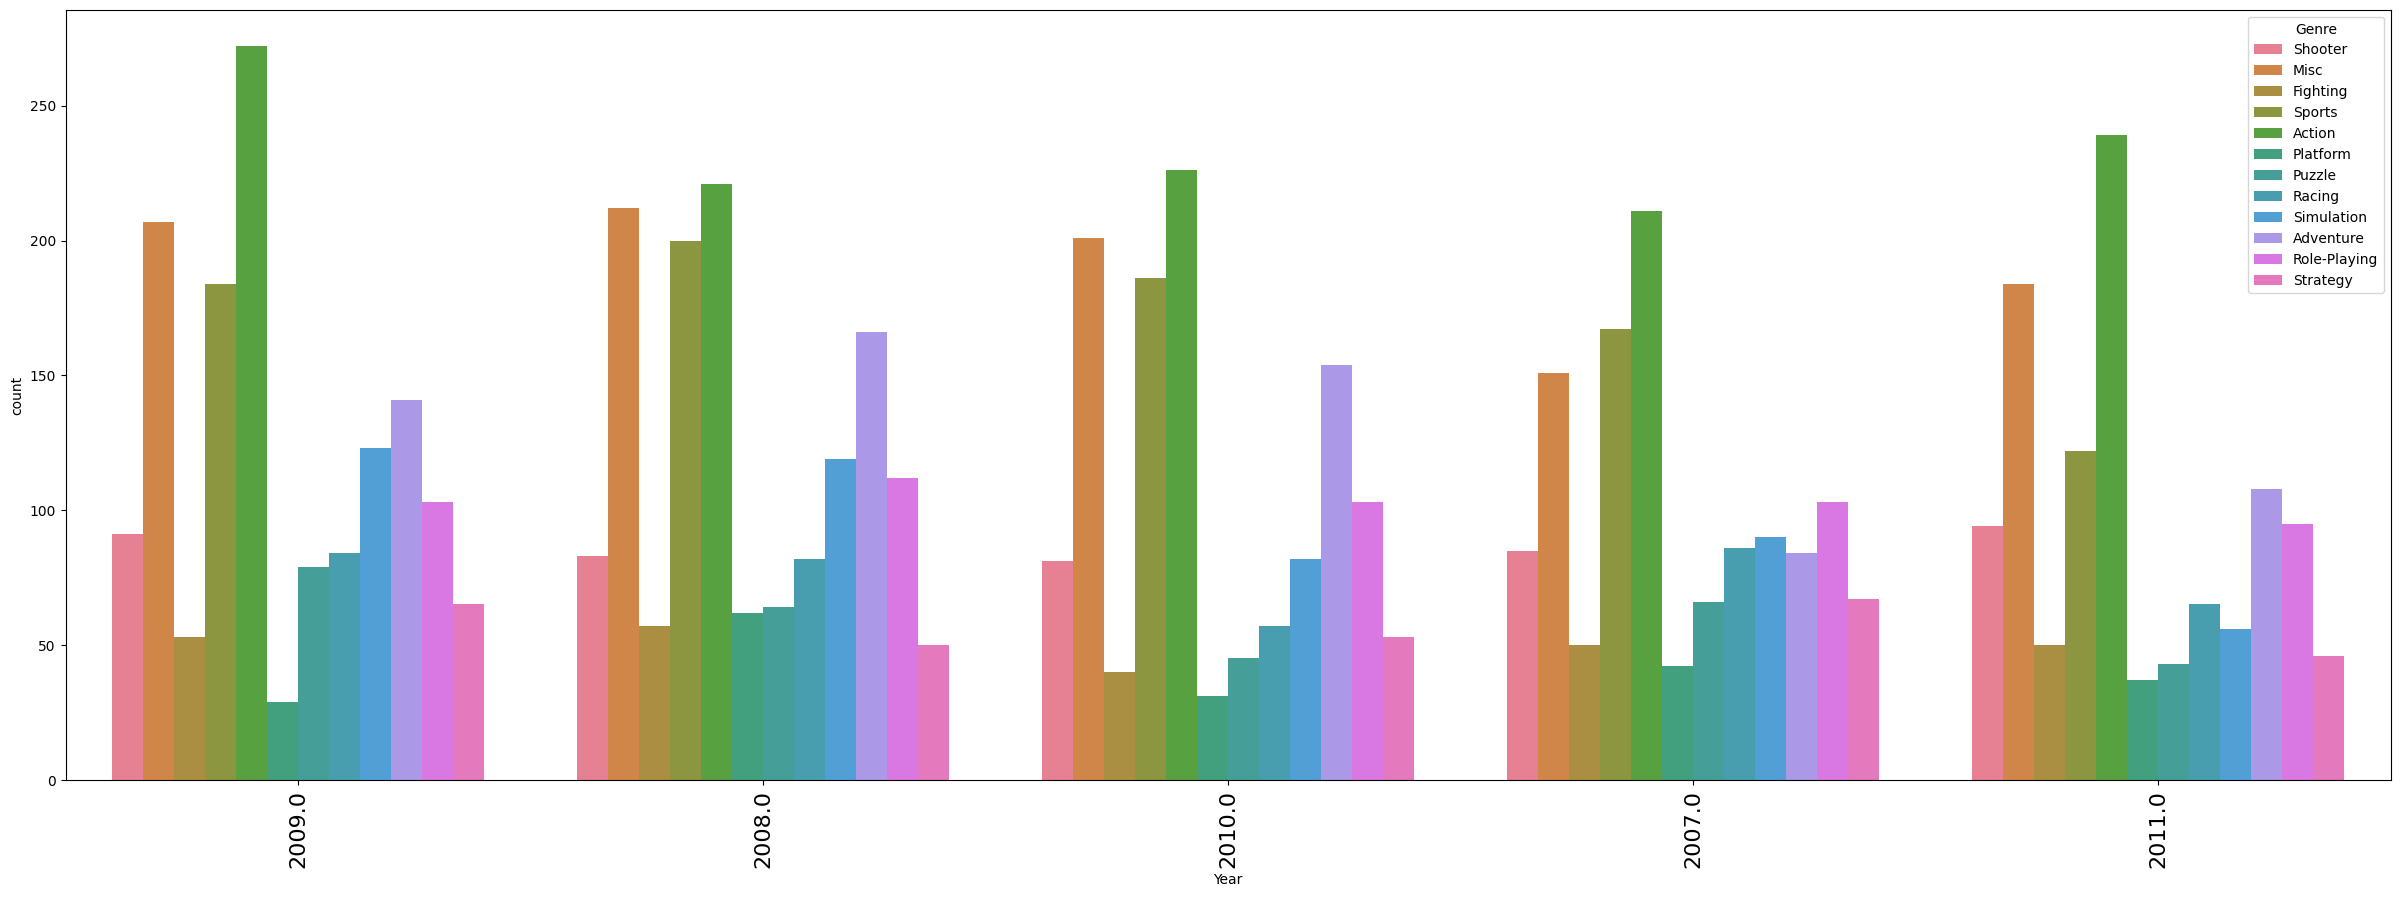

In [17]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

#Which year had the highest sales worldwide ?

In [19]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  T

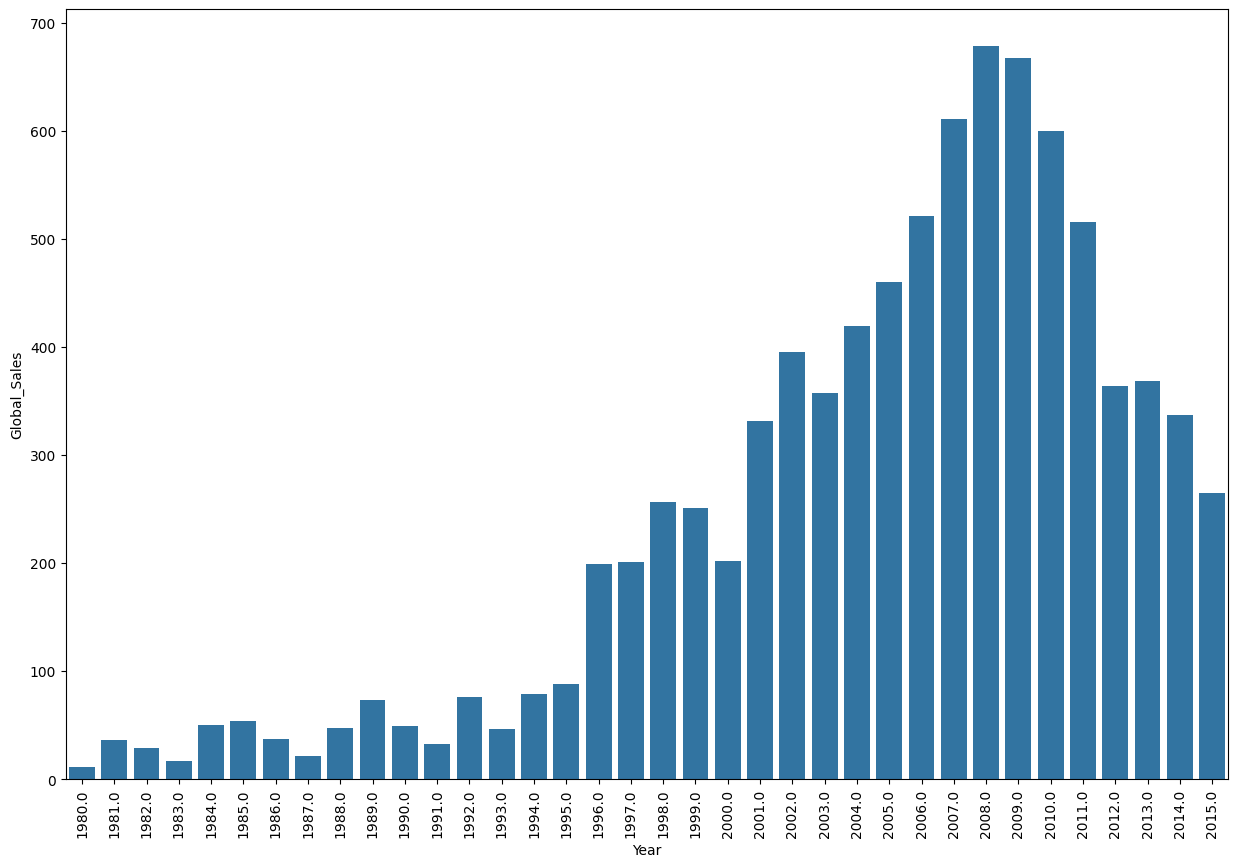

In [20]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

#Which genre game has been released the most in a single year ?

In [21]:
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)

<ipython-input-21-ef43ef230e6e>:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']


In [22]:
genre = year_max_genre['Genre'].values

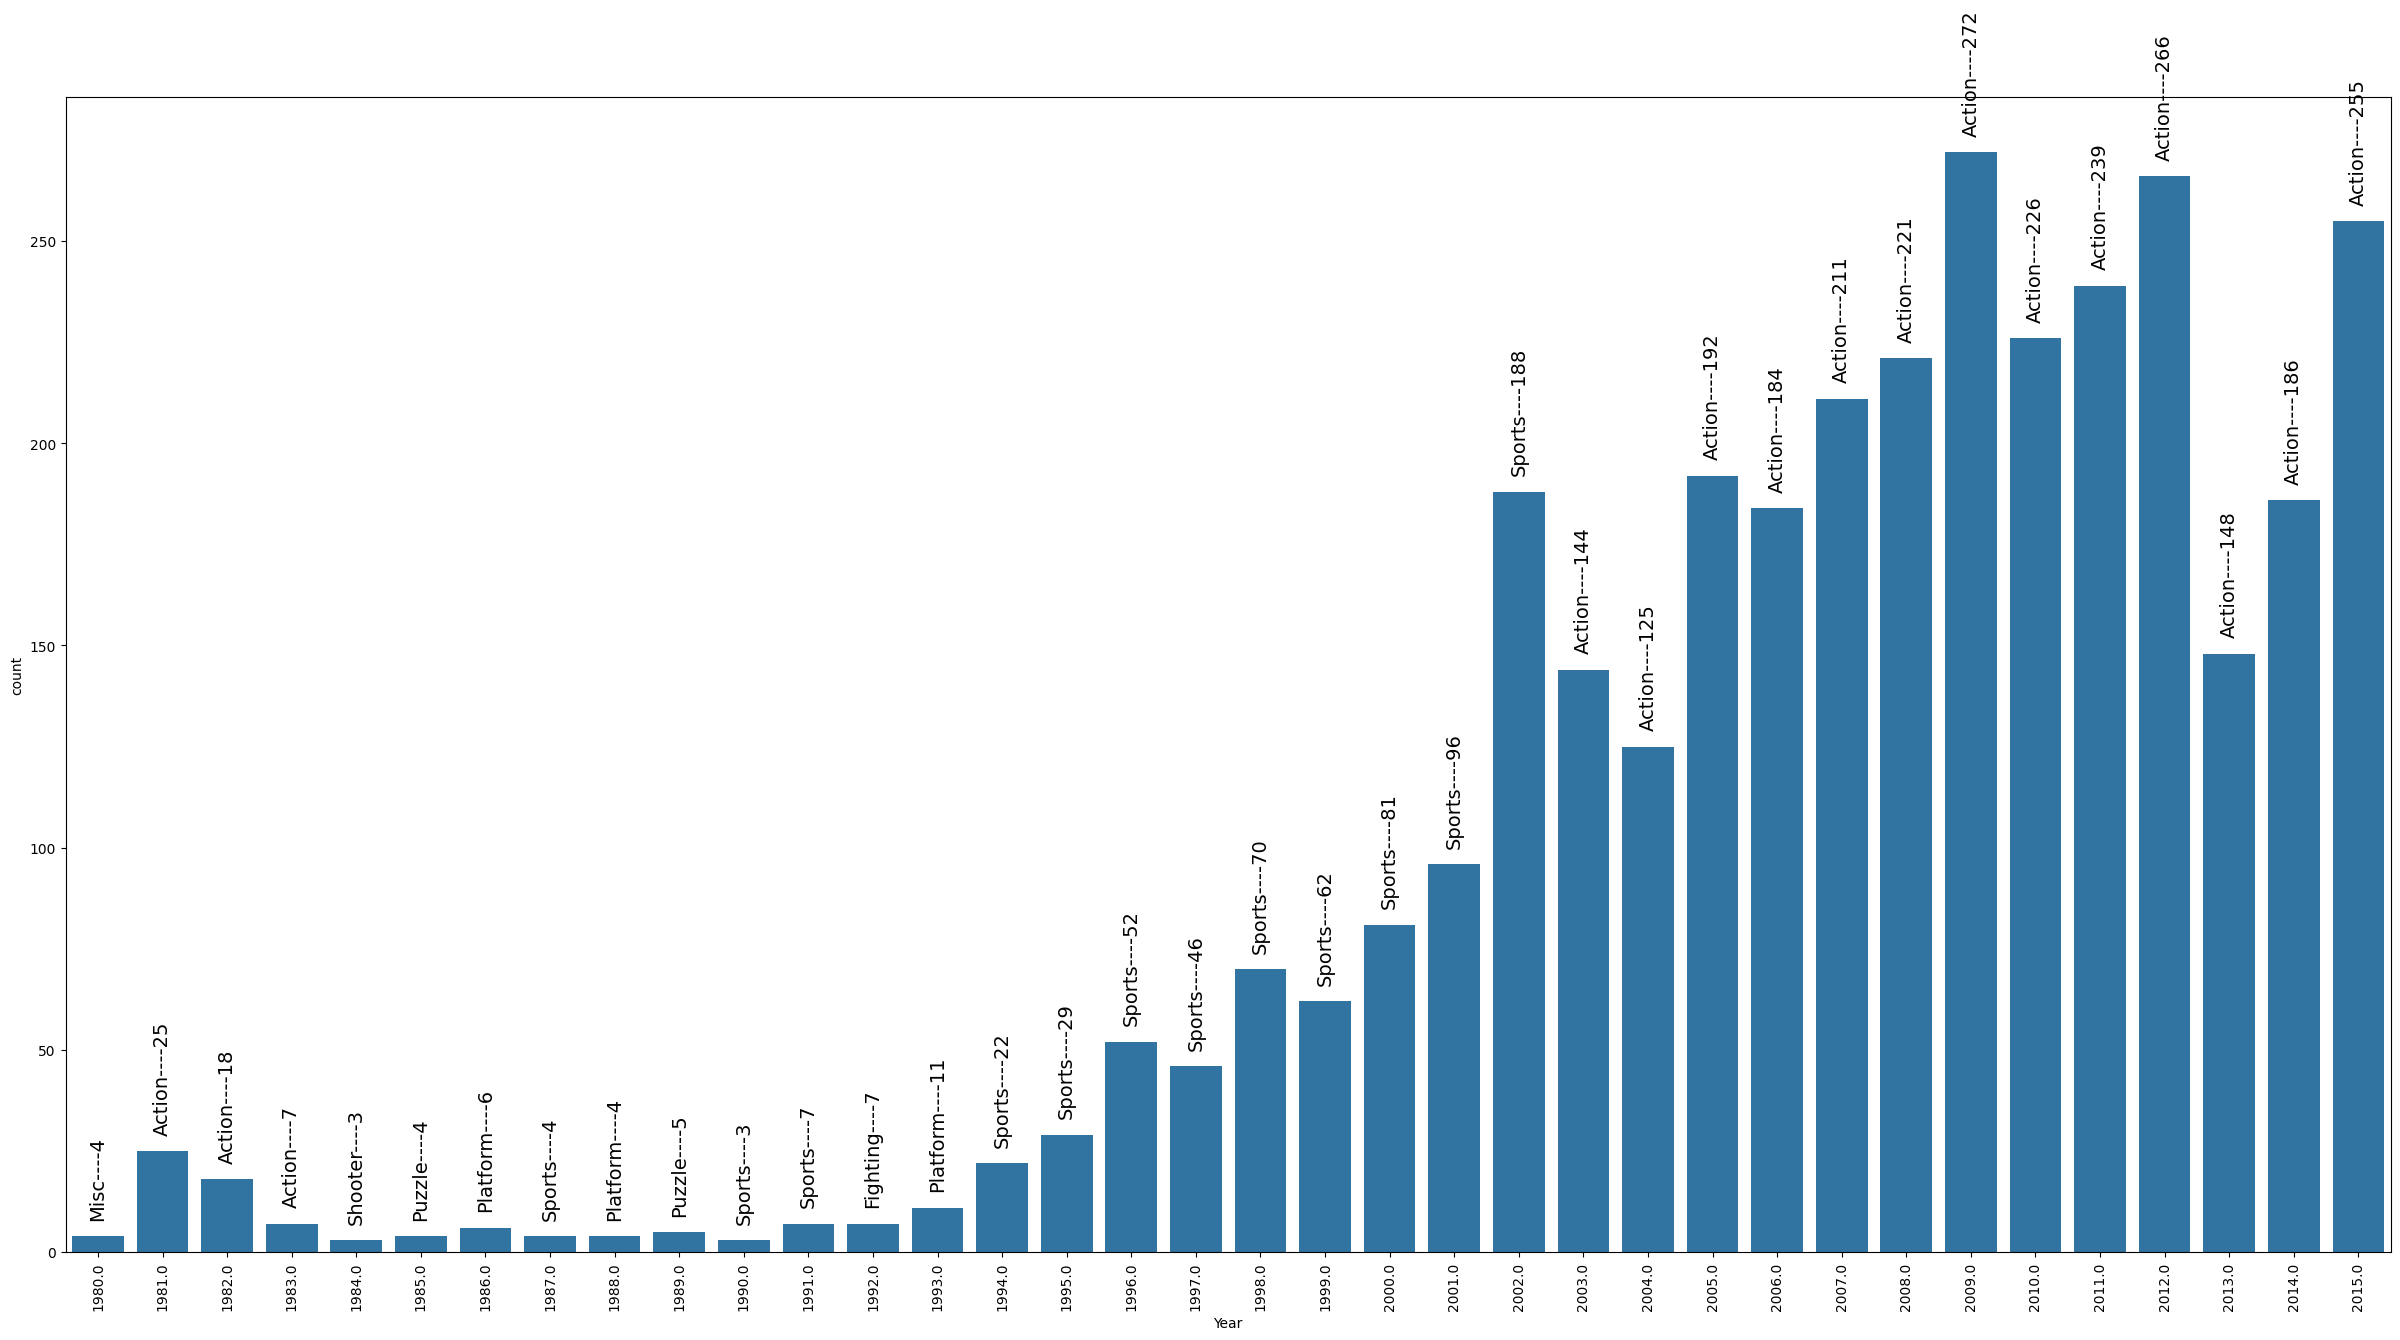

In [23]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

#Which genre game has sold the most in a single year ?

In [24]:
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

<ipython-input-24-bb5b51f0cc05>:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']


In [25]:
genre = year_sale_max['Genre']

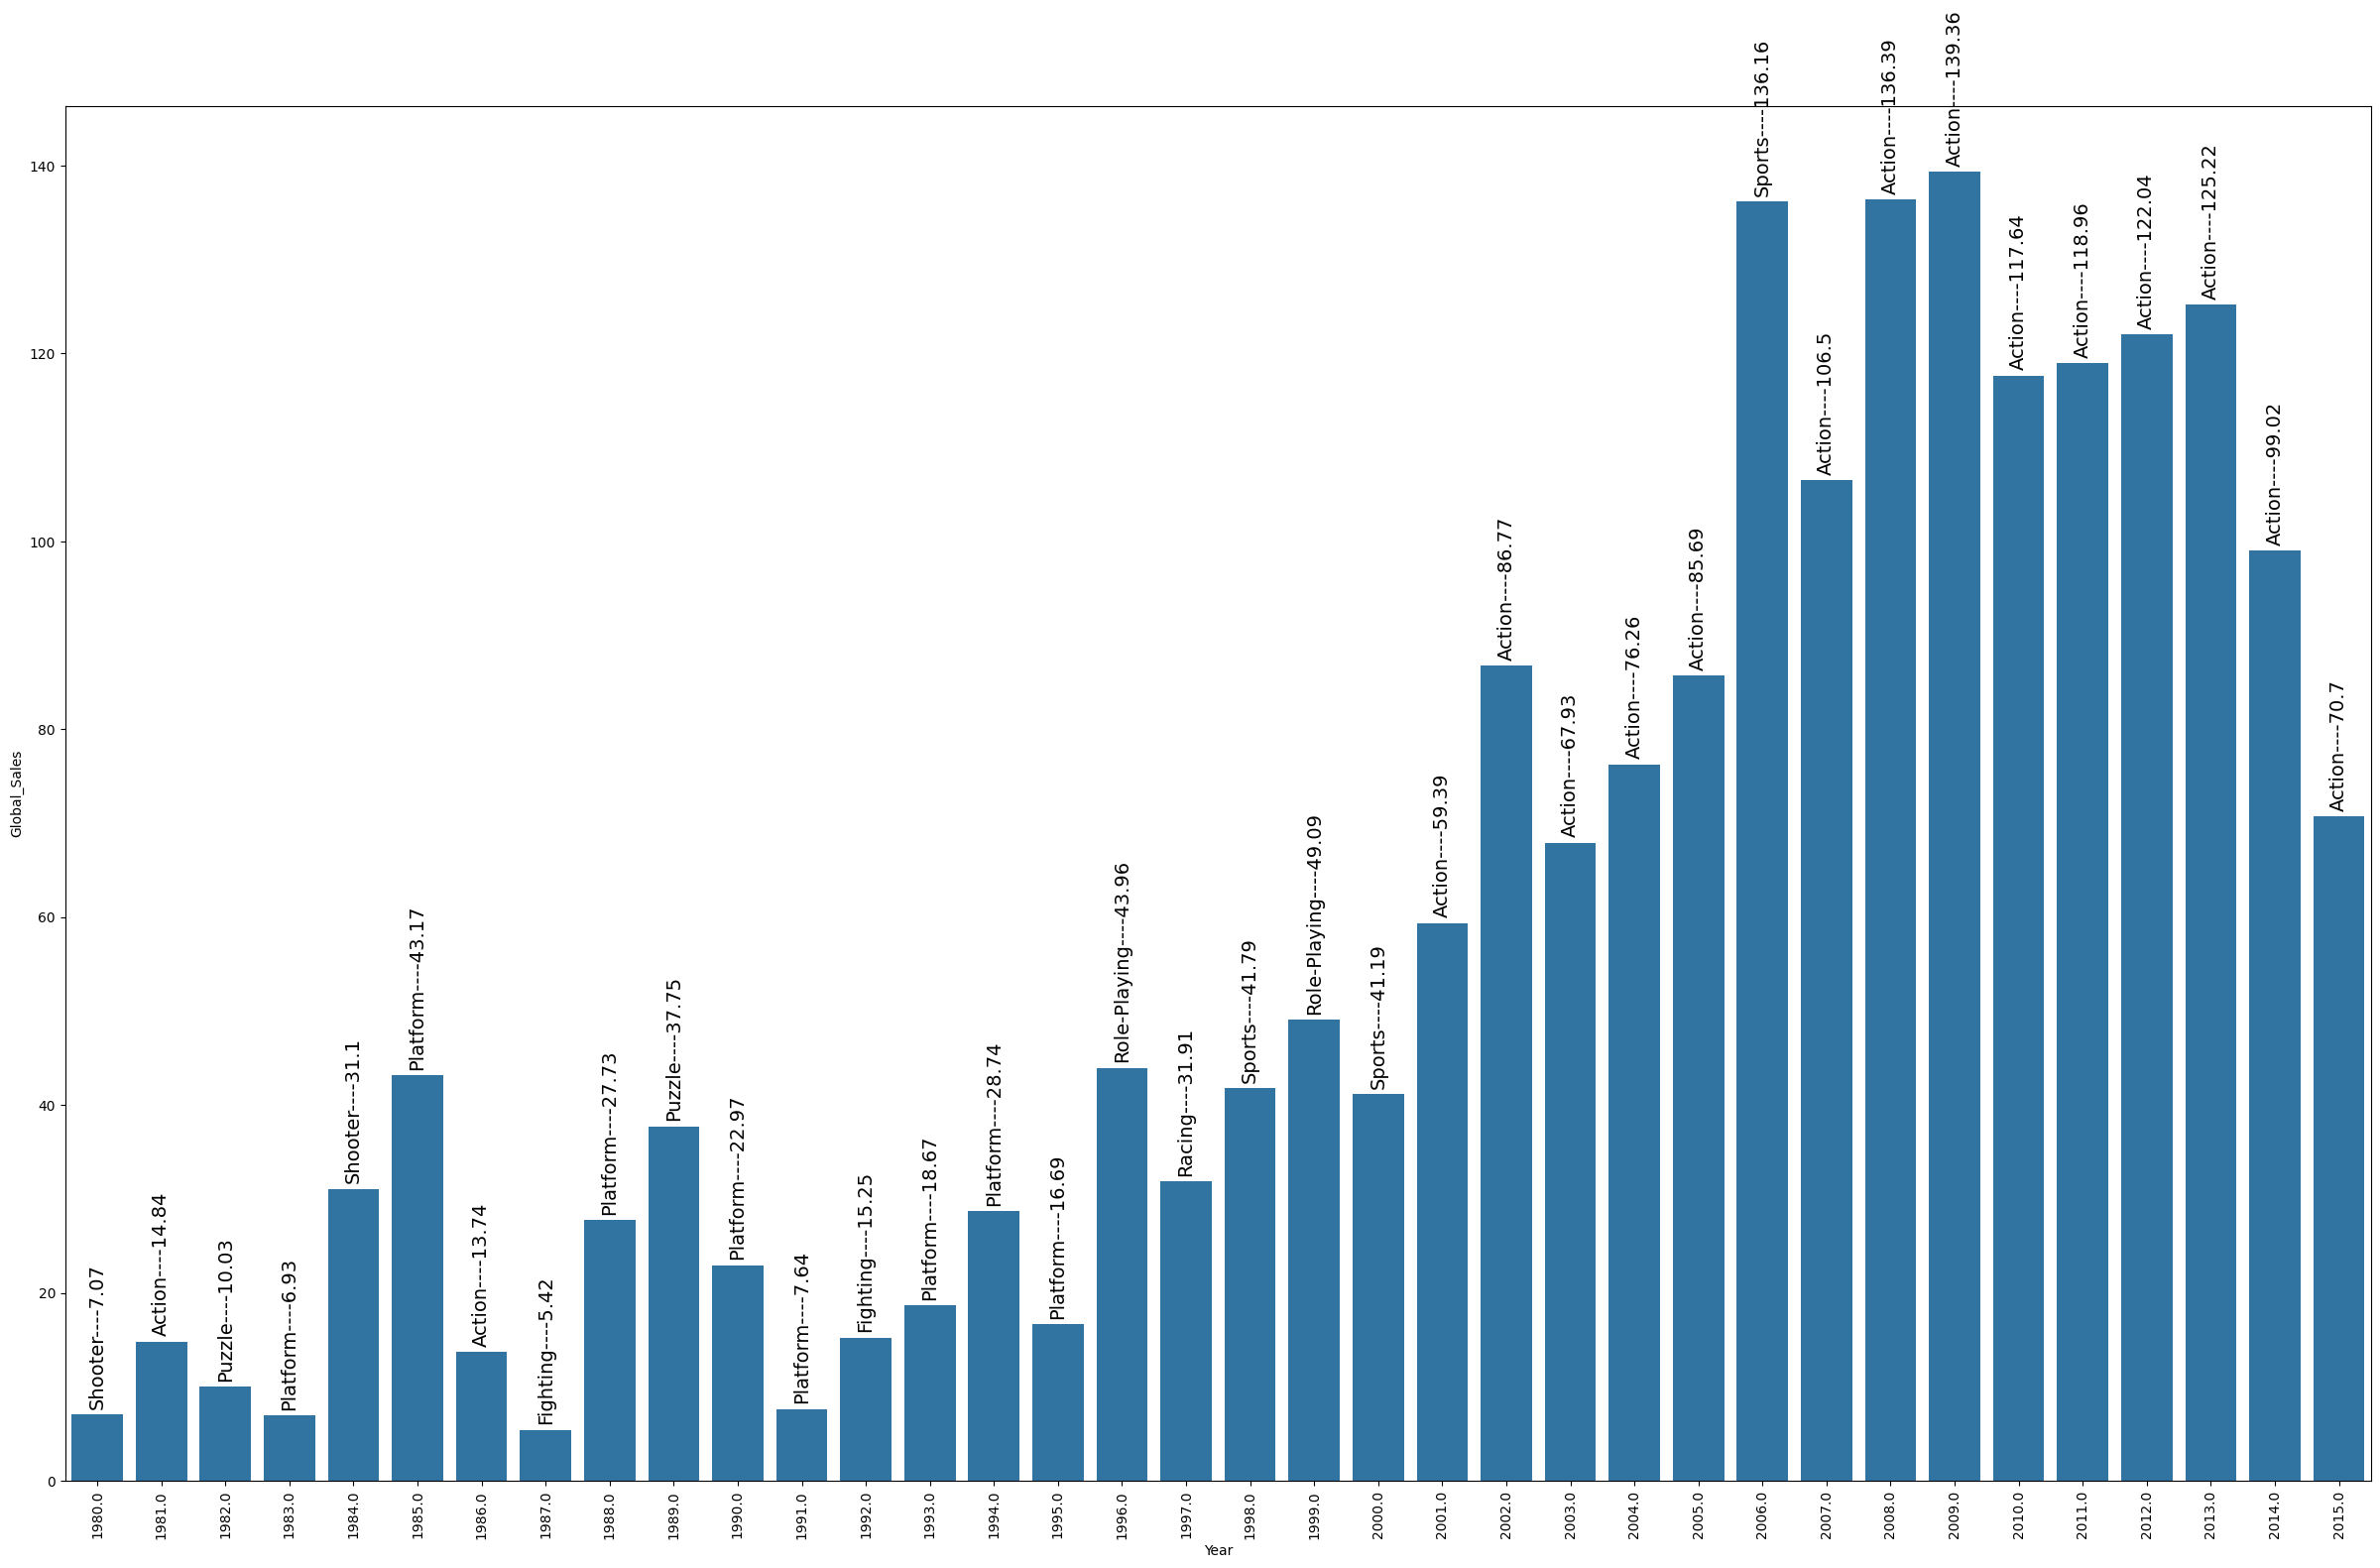

In [26]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

#Which genre game have the highest sale price globally

In [27]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

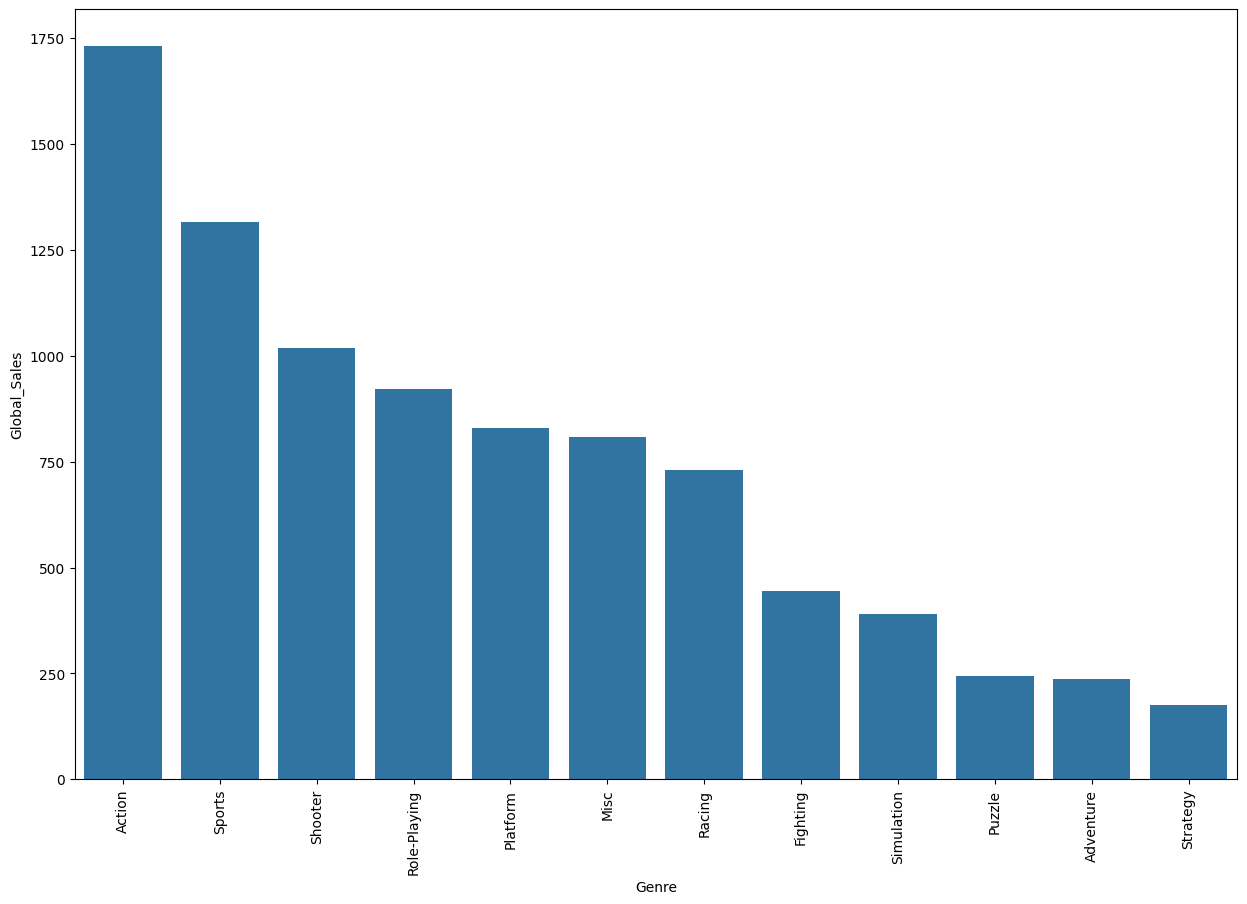

In [28]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)

#Which platfrom have the highest sale price globally

In [29]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'XB'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'GB'),
  Text(11, 0, 'NES'),
  Text(12, 0, '3DS'),
  Text(13, 0, 'PS4'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'GC'),
  Text(17, 0, 'XOne'),
  Text(18, 0, '2600'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'GEN'),
  Text(23, 0, 'DC'),
  Text(24, 0, 'SCD'),
  Text(25, 0, 'NG'),
  Text(26, 0, 'WS'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

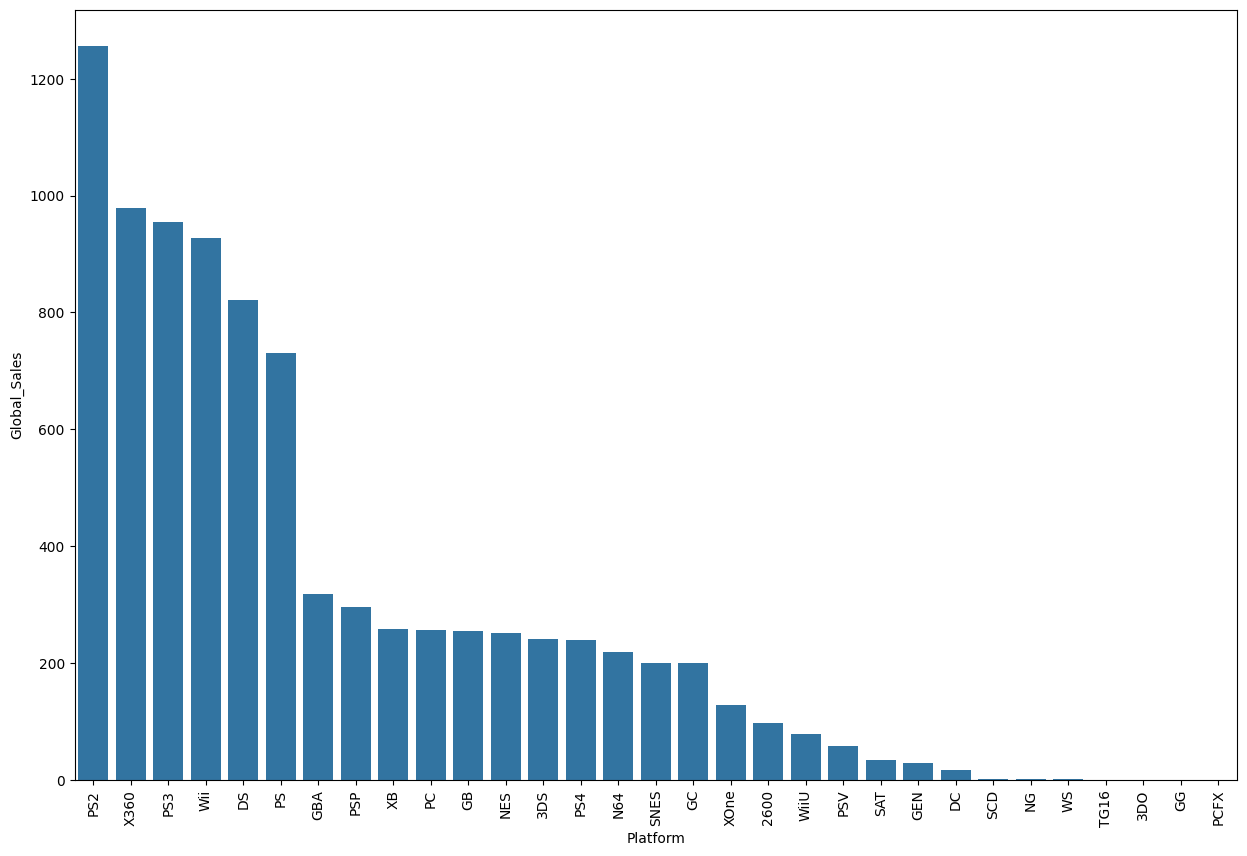

In [30]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)

#Which individual game have the highest sale price globally?

In [32]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)

In [33]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

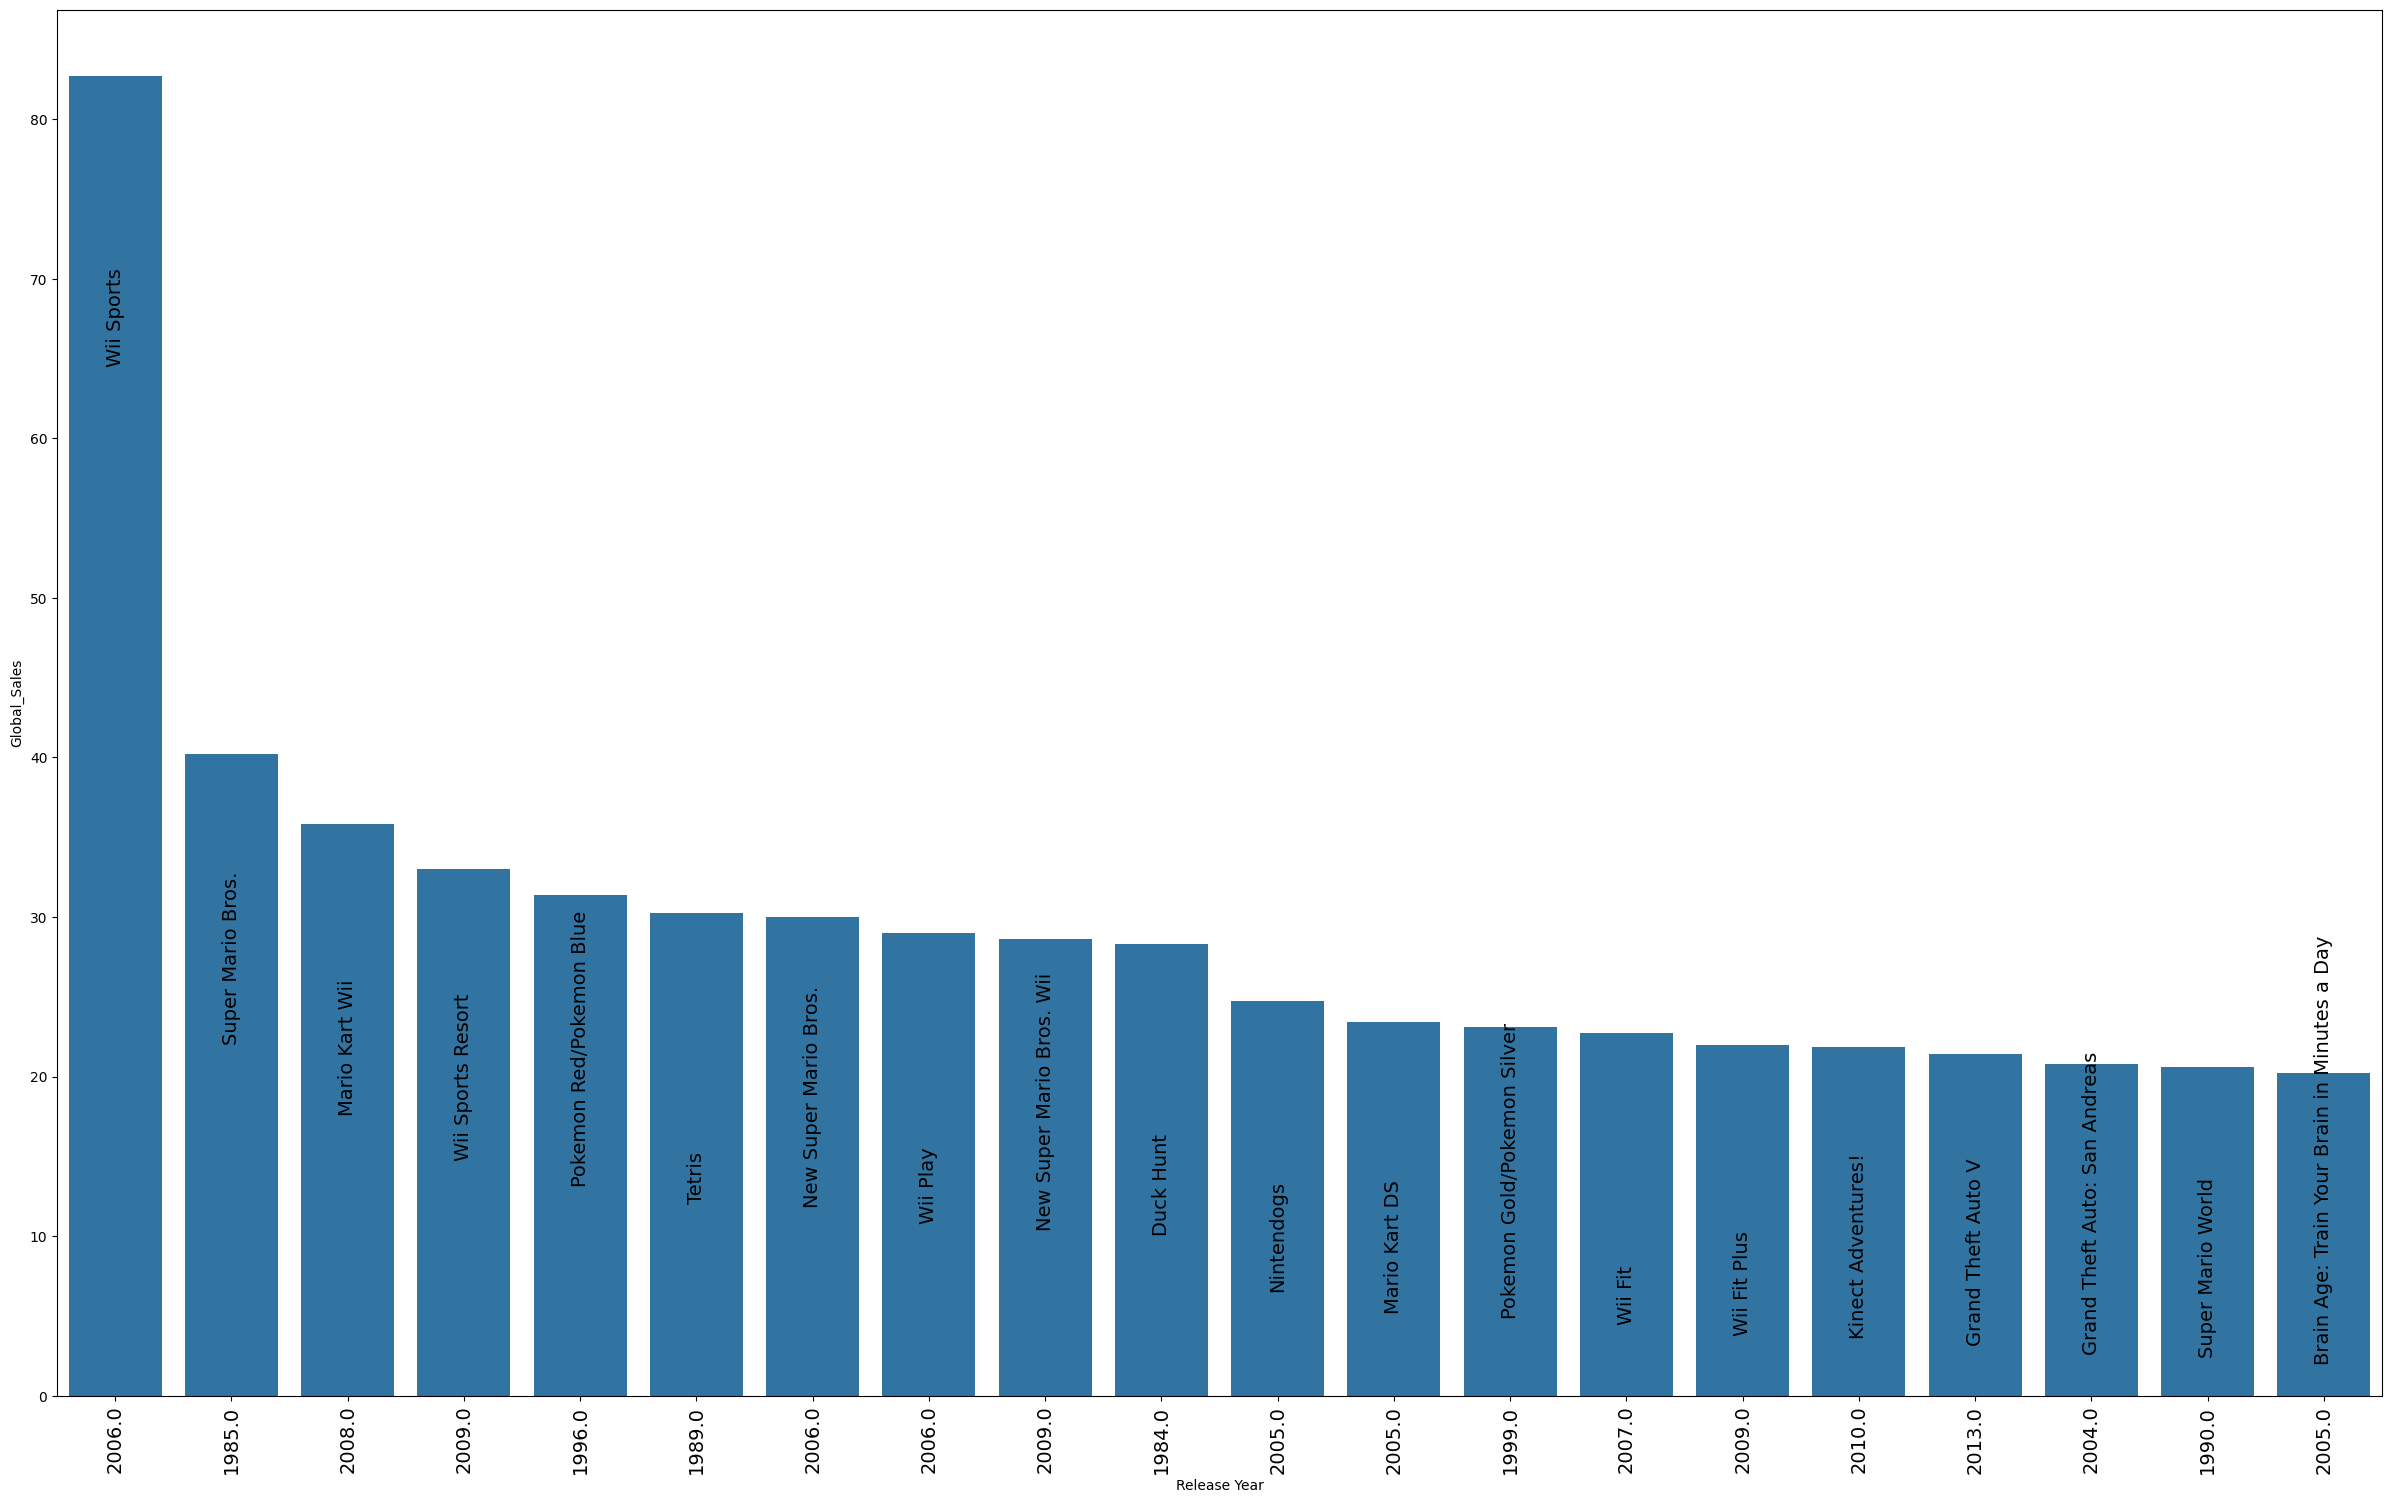

In [34]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()

#Sales comparison by genre

In [35]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map

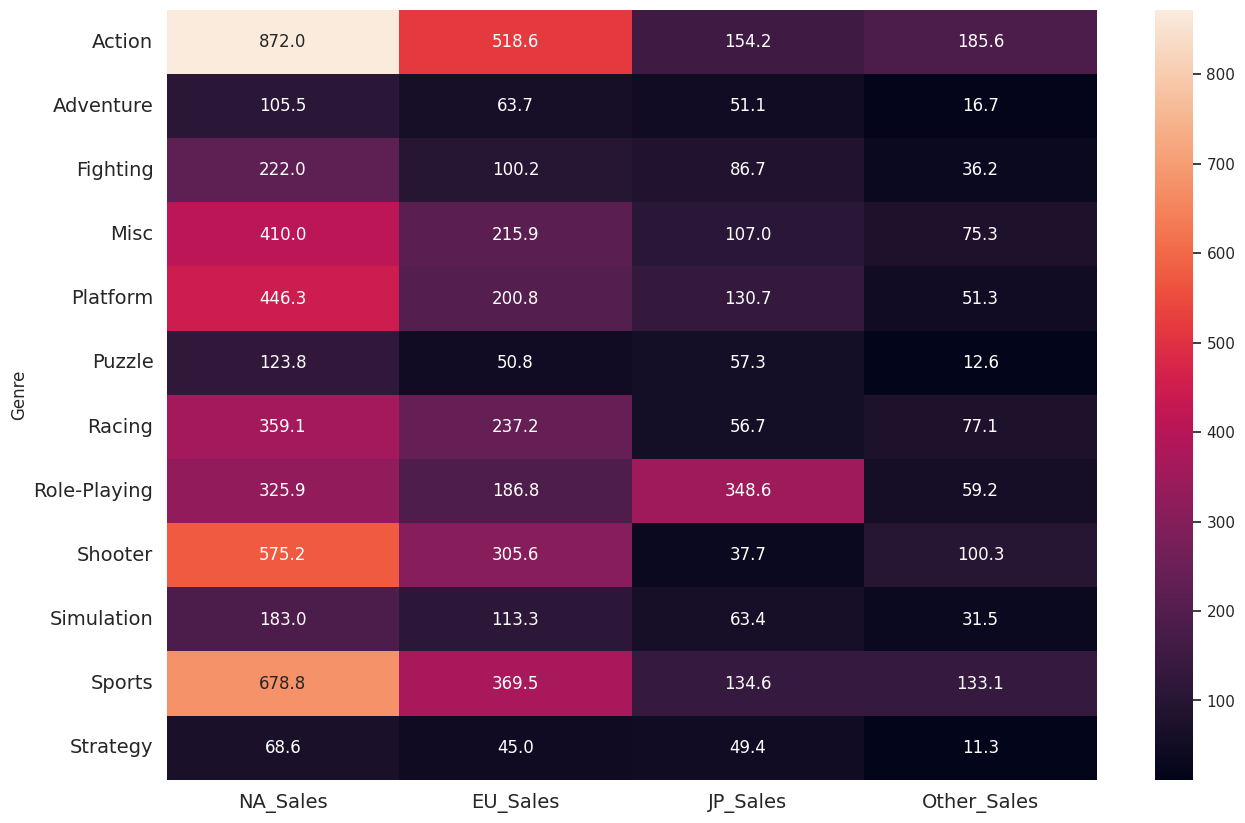

In [36]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [37]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26


<Axes: xlabel='Genre', ylabel='Sale_Price'>

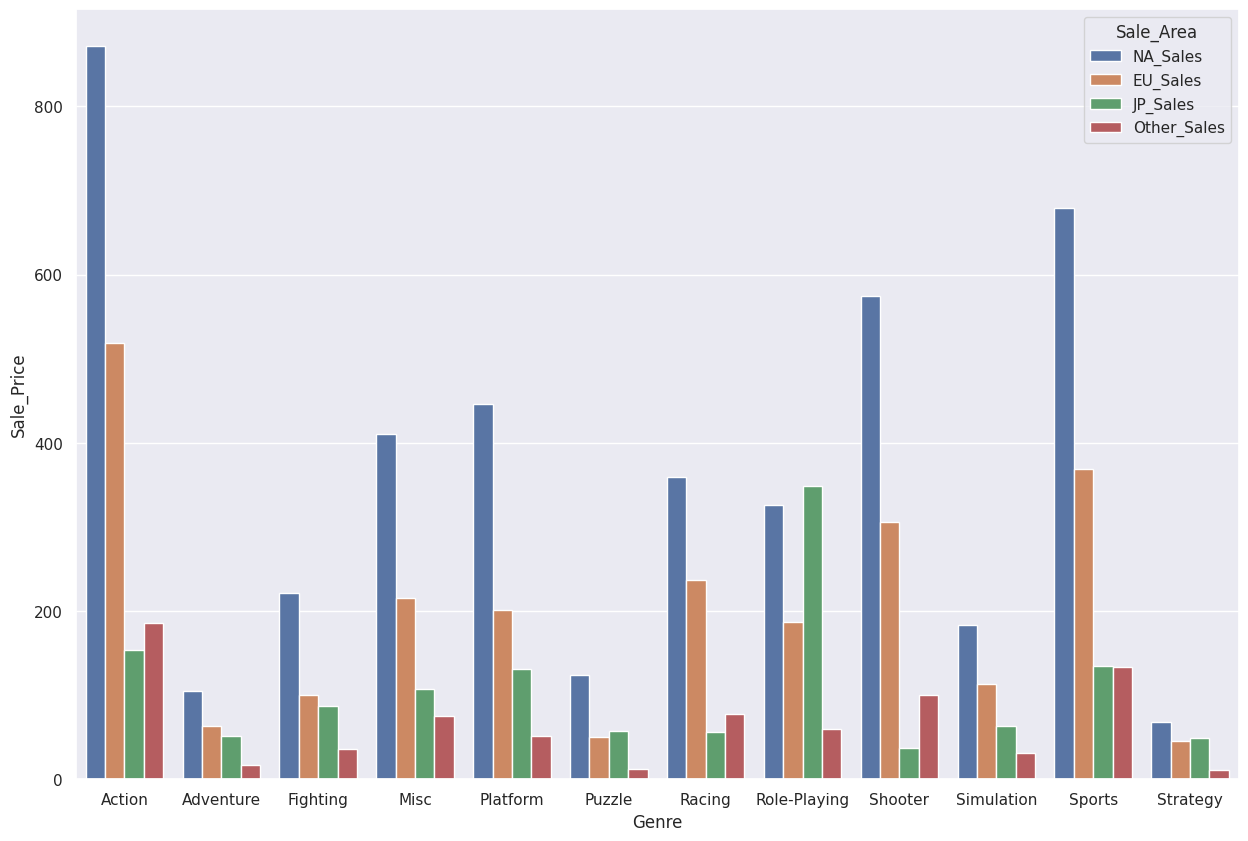

In [38]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

#Sales comparison by platform

In [39]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [40]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

In [41]:
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.04
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.44


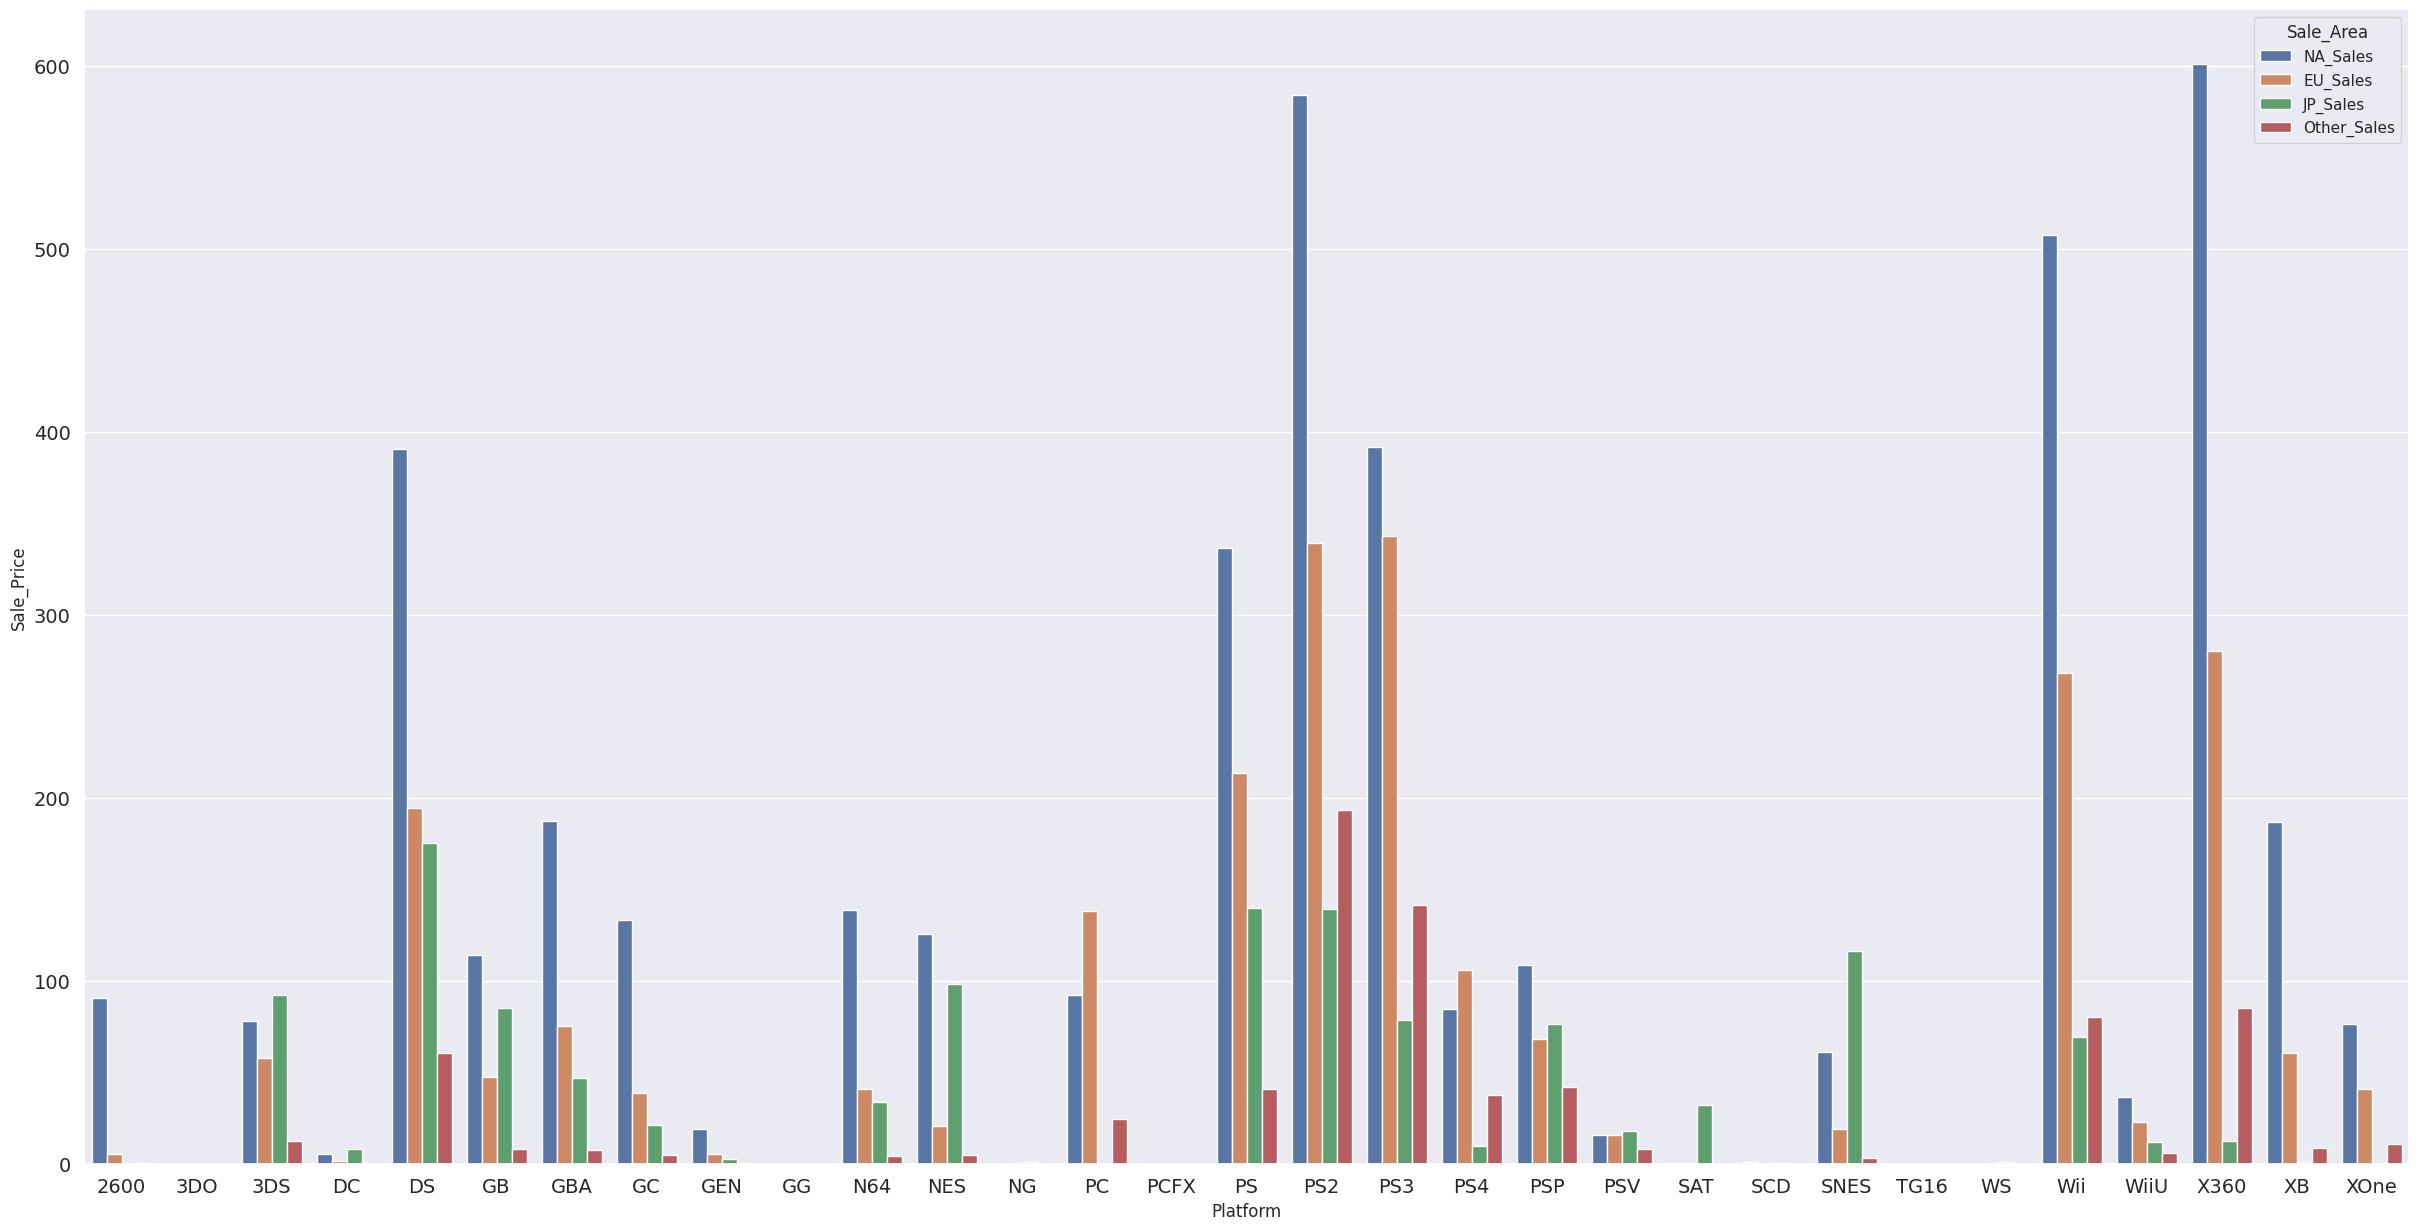

In [42]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#Top 20 Publisher

In [43]:
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Ubisoft'),
  Text(3, 0, 'Namco Bandai Games'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Disney Interactive Studios'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Warner Bros. Interactive Entertainment'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

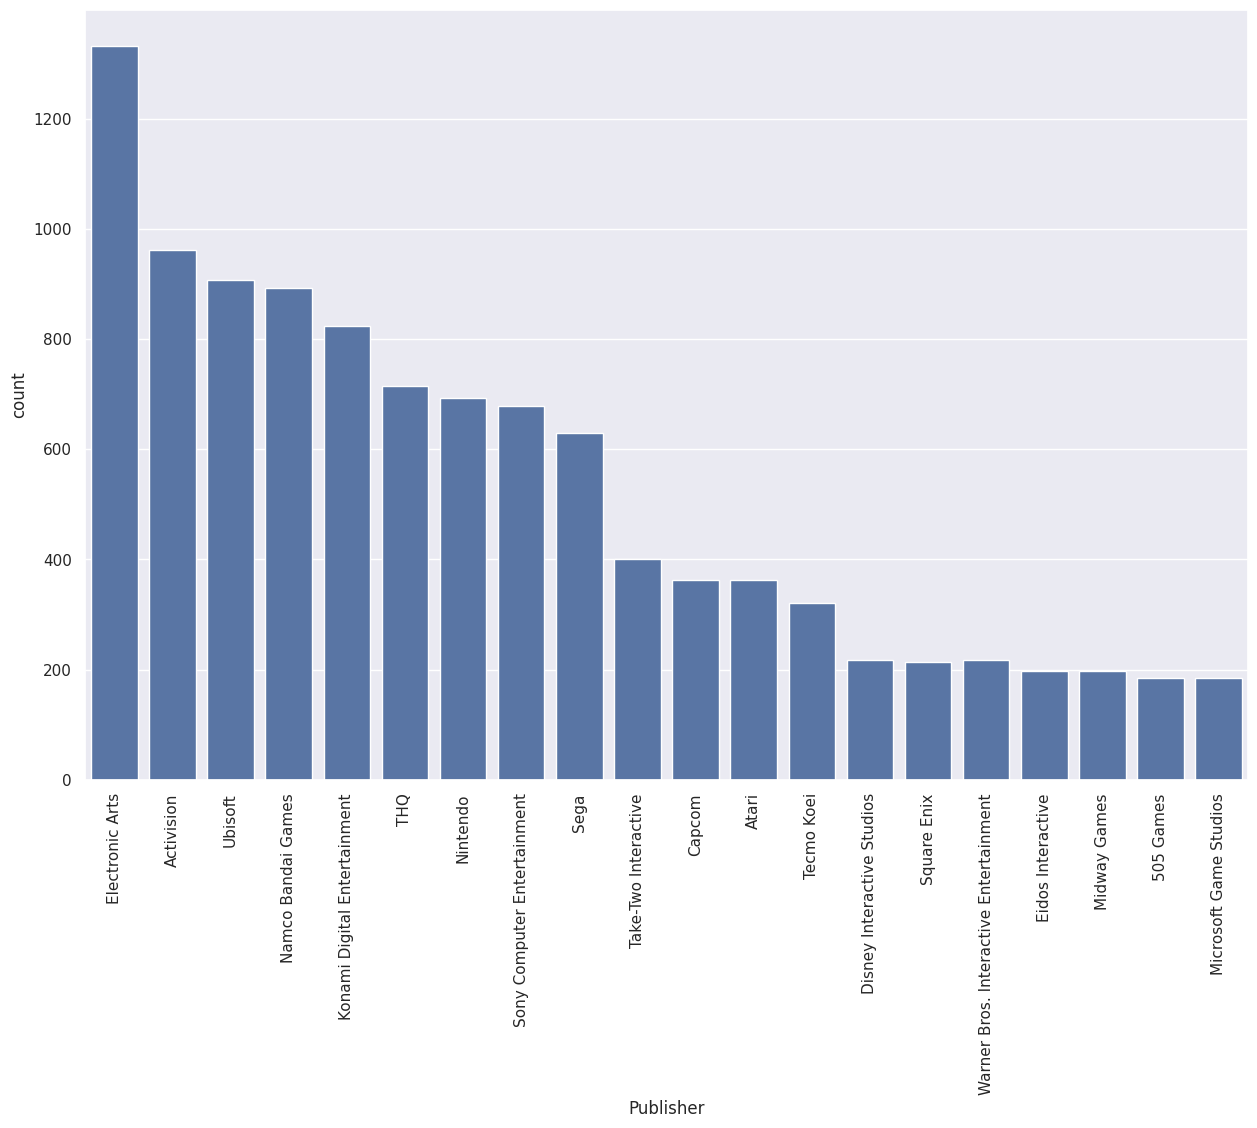

In [44]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

#Top global sales by publisher

In [45]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Warner Bros. Interactive Entertainment'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

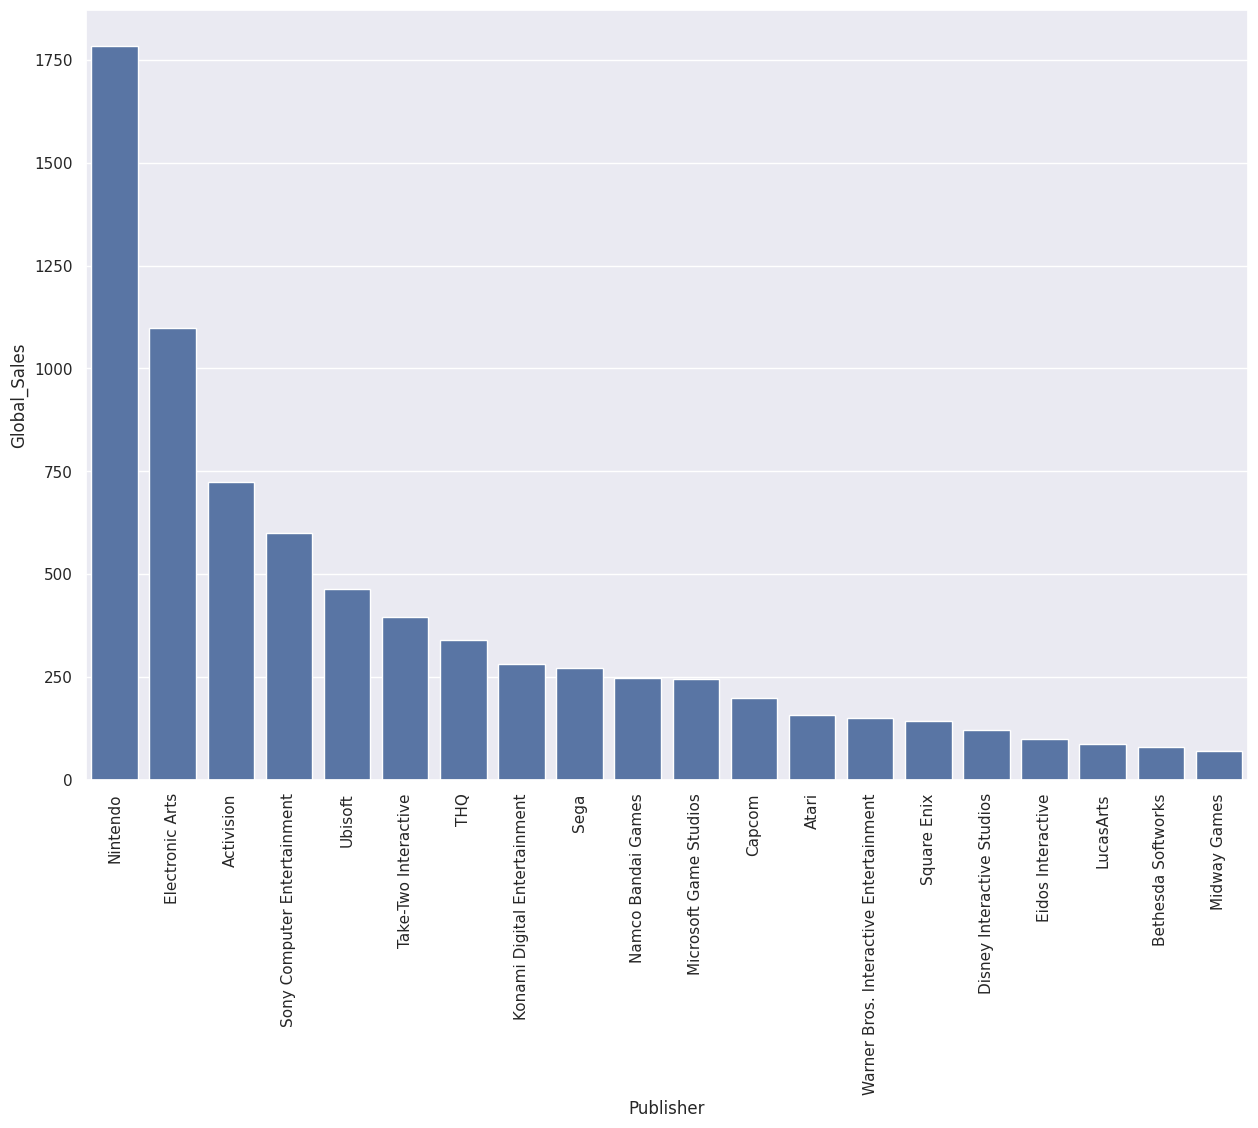

In [46]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

#Top publisher by Count each year

In [47]:
top_publisher =  data[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)

<ipython-input-47-2f139a91c2f1>:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']


In [48]:
publisher= top_publisher_count['Publisher']

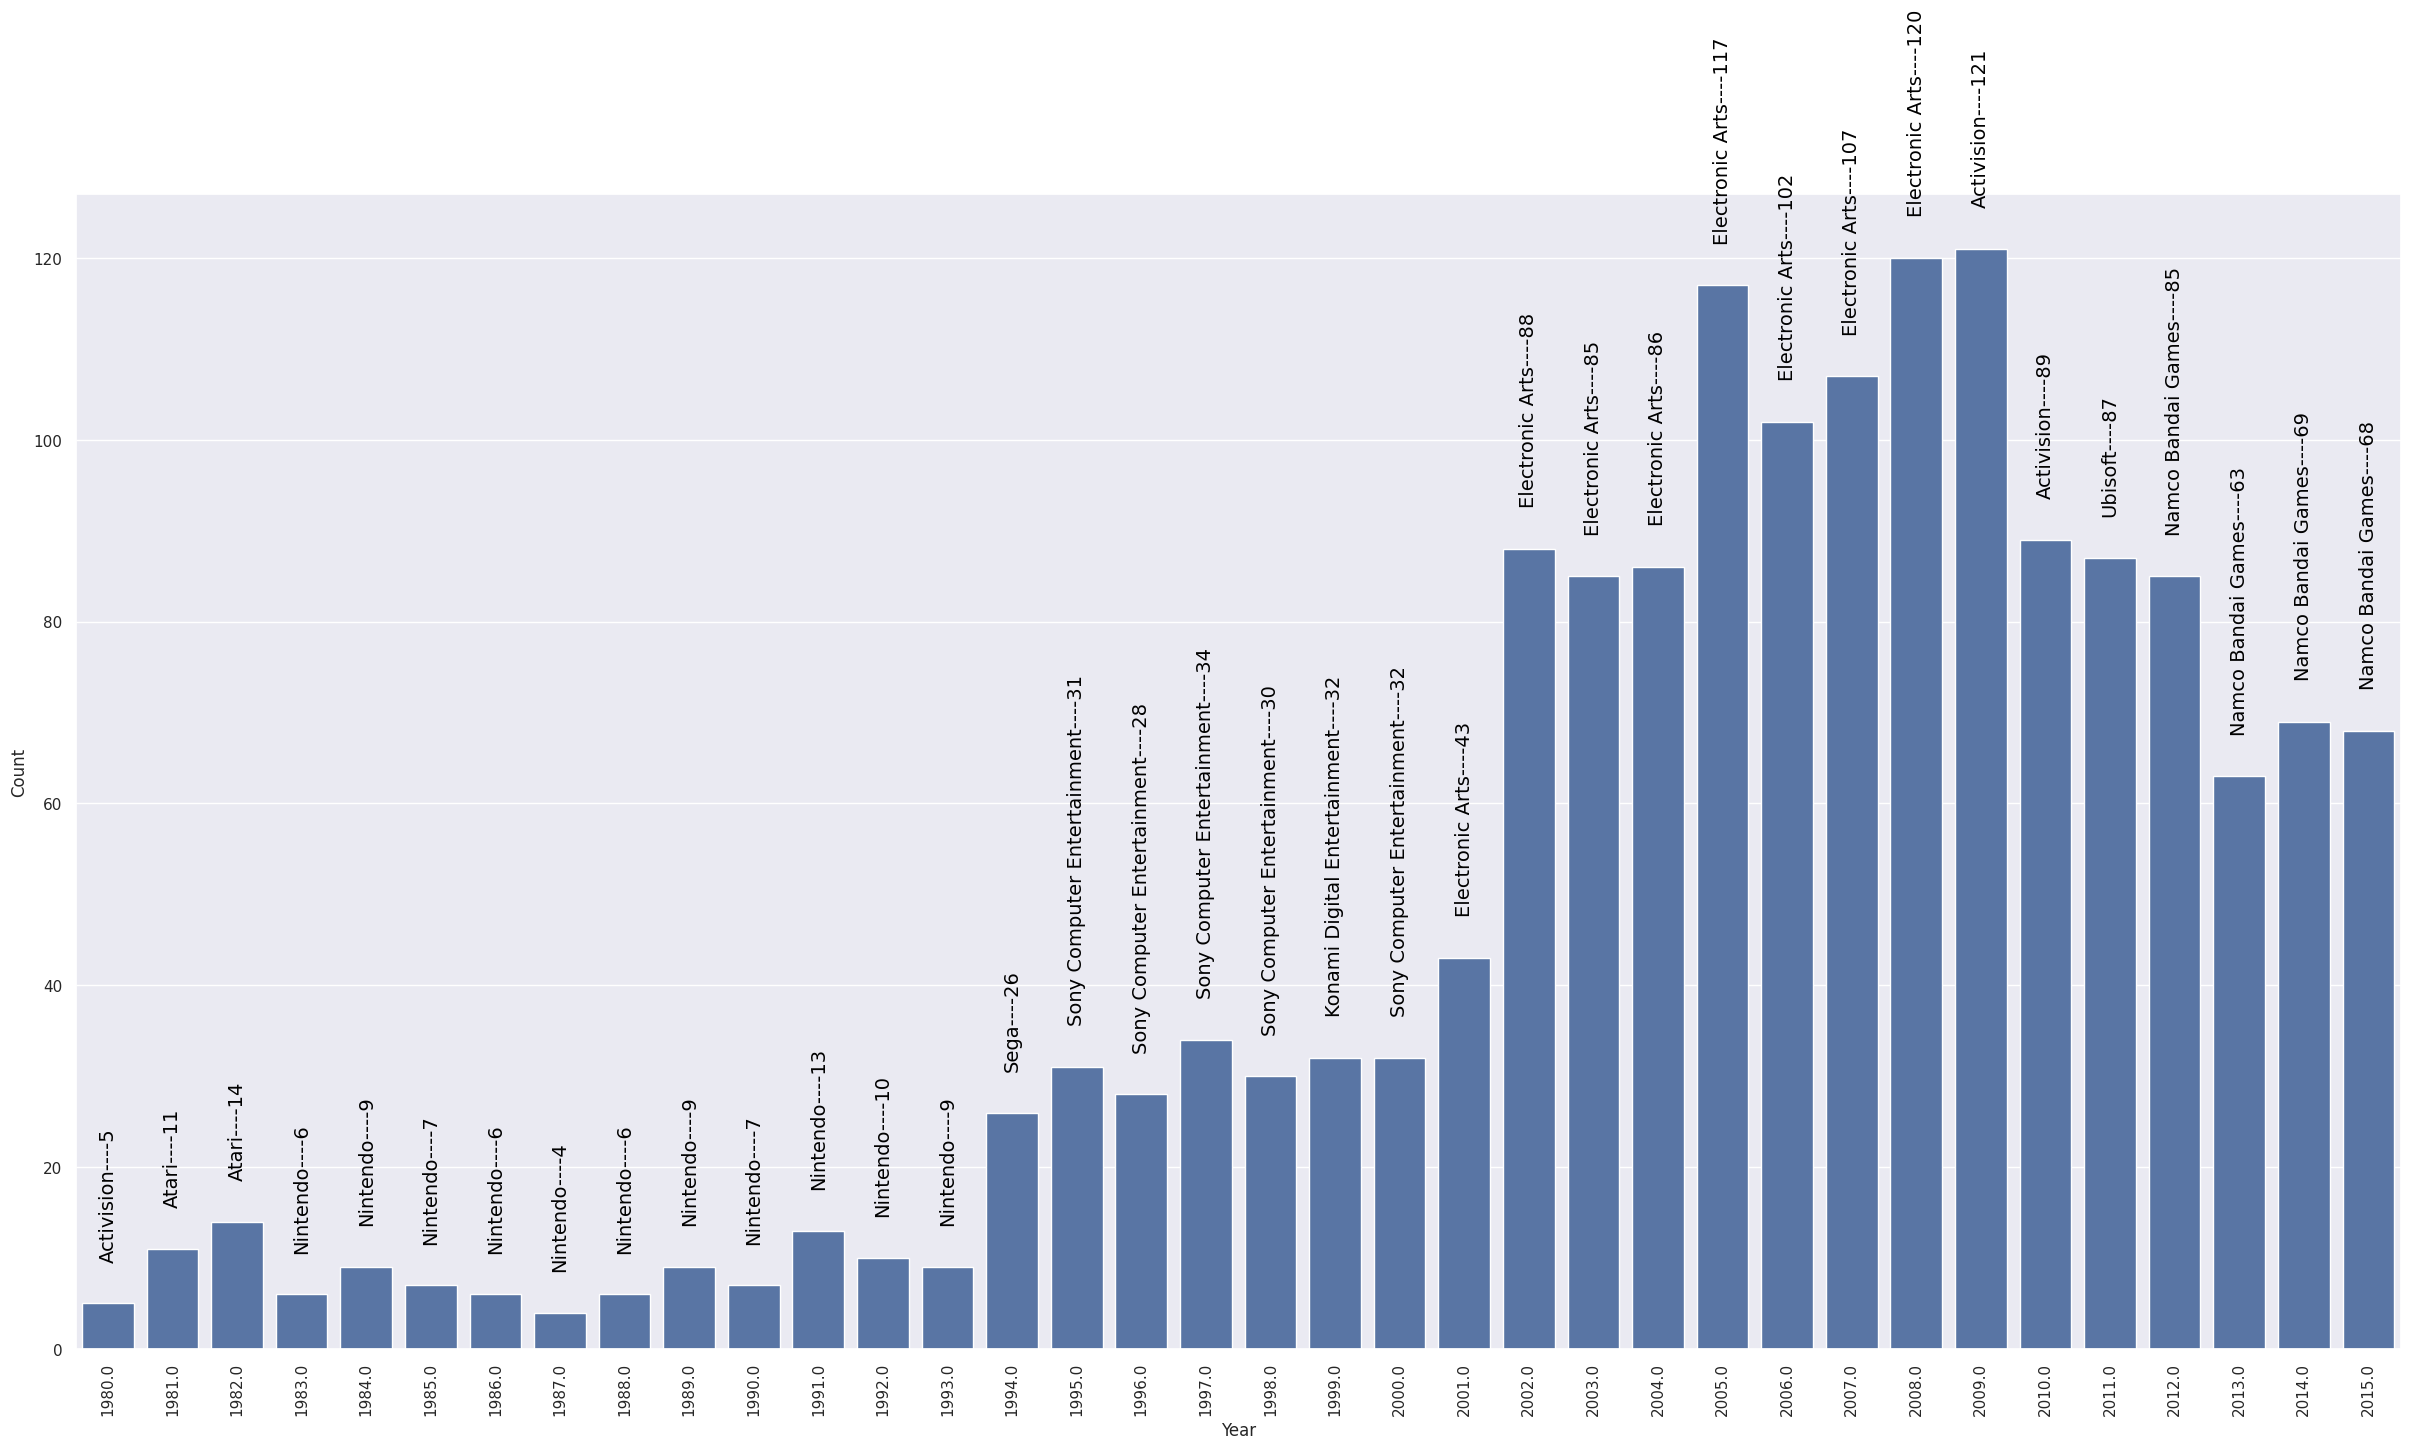

In [50]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
#     print(asd)
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1


plt.xticks(rotation=90)
plt.show()

#Total revenue by region

In [51]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4370.02
1,EU_Sales,2407.37
2,JP_Sales,1277.27
3,Other_Sales,789.98


<Axes: xlabel='region', ylabel='sale'>

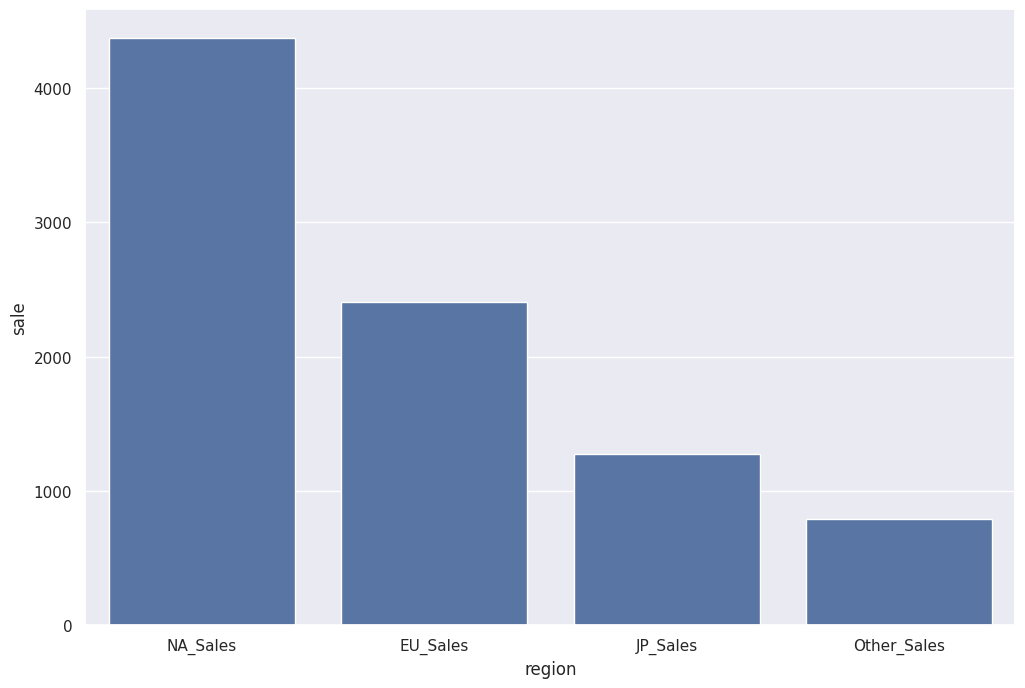

In [52]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

([<matplotlib.patches.Wedge at 0x7ad53795bbb0>,
 [Text(-1.0998101987078979, 0.020433472981709867, 'NA_Sales'),
  Text(0.8027109043560947, -0.7521005278736486, 'EU_Sales'),
  Text(0.9343594784564982, 0.5804932084172052, 'JP_Sales'),
  Text(0.30462466305633346, 1.0569786254498317, 'Other_Sales')],
 [Text(-0.5998964720224897, 0.011145530717296289, '49.4%'),
  Text(0.4378423114669607, -0.4102366515674446, '27.2%'),
  Text(0.5096506246126353, 0.31663265913665734, '14.4%'),
  Text(0.16615890712163642, 0.576533795699908, '8.9%')])

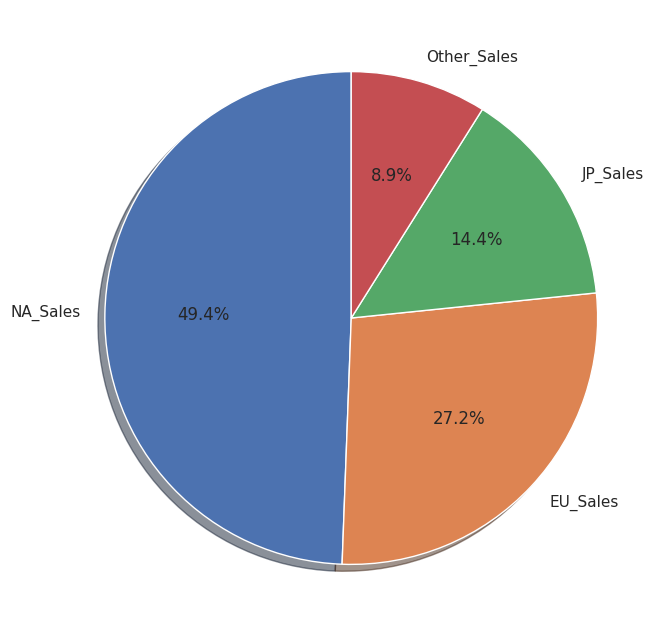

In [53]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)